In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Telecom_Customer_Churn_Dataset.csv')

In [3]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# how many rows and columns
dataset.shape

(7043, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Convert TotalCharges to numeric, turning invalid ones into NaN
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# Now check the type
print(dataset['TotalCharges'].dtype)  # Should now show float64

# Optional: Drop or fill NaN values
dataset.dropna(subset=['TotalCharges'], inplace=True)

float64


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [9]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
def univariate(dataset):
    Qual=[]
    Quan=[]
    for columnName in dataset:
        #print(columnName)
        if(dataset[columnName].dtypes =='O'):
            #print('Qual')
            Qual.append(columnName)
        else:
            #print('Quan')
            Quan.append(columnName)
    return Qual,Quan

In [11]:
Qual,Quan = univariate(dataset)

In [12]:
Qual

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
Quan

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
# Drop rows with NaN in TotalCharges or tenure = 0 to avoid division errors
dataset = dataset[dataset['tenure'] > 0]
dataset = dataset.dropna(subset=['TotalCharges'])

# 1️⃣ Create a new feature: Average Monthly Spend
dataset['AverageMonthlySpend'] = dataset['TotalCharges'] / dataset['tenure']

# 2️⃣ Create tenure buckets
tenure_bins = [0, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']
dataset['tenure_group'] = pd.cut(dataset['tenure'], bins=tenure_bins, labels=tenure_labels)

# 🖨️ Display result
print(dataset[['tenure', 'TotalCharges', 'AverageMonthlySpend', 'tenure_group']].head())

   tenure  TotalCharges  AverageMonthlySpend tenure_group
0       1         29.85            29.850000         0–12
1      34       1889.50            55.573529        25–36
2       2        108.15            54.075000         0–12
3      45       1840.75            40.905556        37–48
4       2        151.65            75.825000         0–12


In [15]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlySpend,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0–12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,25–36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,0–12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,37–48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,0–12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,82.937500,13–24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,102.262500,61–72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,31.495455,0–12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,76.650000,0–12


In [17]:
dataset['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [18]:
dataset['Churn'].value_counts() / len(dataset) * 100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

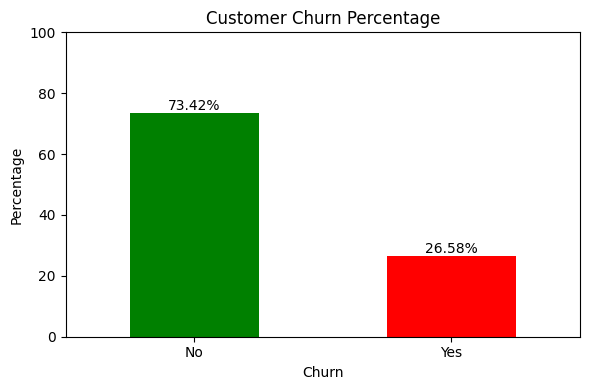

In [19]:
# Calculate churn percentages
churn_percent = dataset['Churn'].value_counts(normalize=True) * 100

# Bar Chart
plt.figure(figsize=(6, 4))
churn_percent.plot(kind='bar', color=['green', 'red'])
plt.title('Customer Churn Percentage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)
for i, val in enumerate(churn_percent):
    plt.text(i, val + 1, f"{val:.2f}%", ha='center')
plt.tight_layout()
plt.show()

In [20]:
print(dataset['tenure'].max())

72


In [21]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlySpend,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0–12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,25–36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,0–12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,37–48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,0–12


In [22]:
dataset.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [24]:
dataset.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlySpend,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,0–12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,25–36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,0–12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,37–48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,0–12


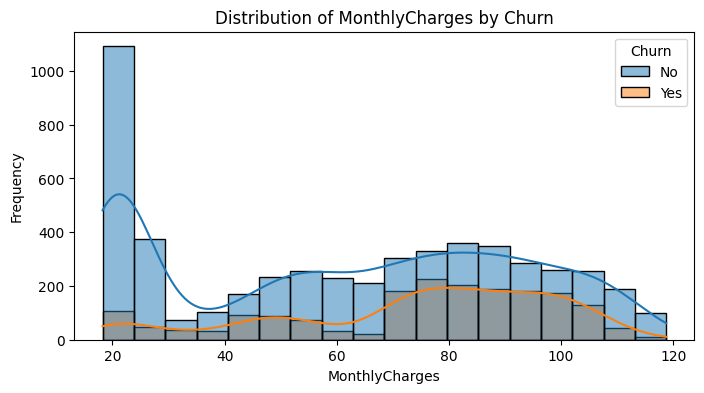

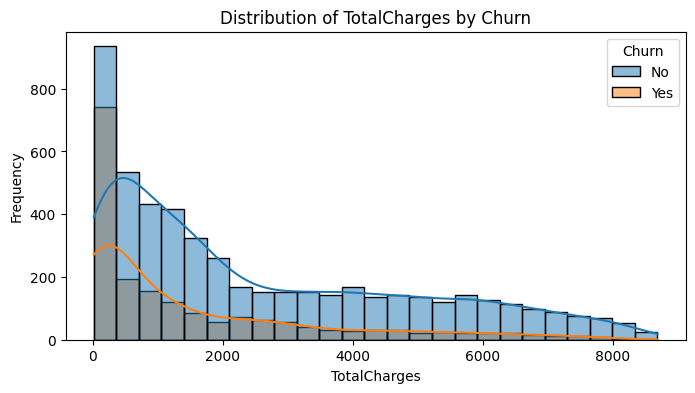

In [25]:
# Distribution of numerical features by churn
numerical_features = ['MonthlyCharges', 'TotalCharges']
for col in numerical_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=dataset, x=col, hue='Churn', kde=True)
  plt.title(f'Distribution of {col} by Churn')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

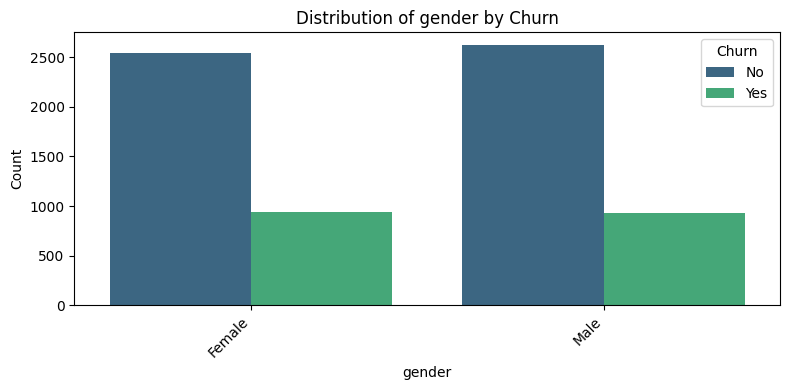

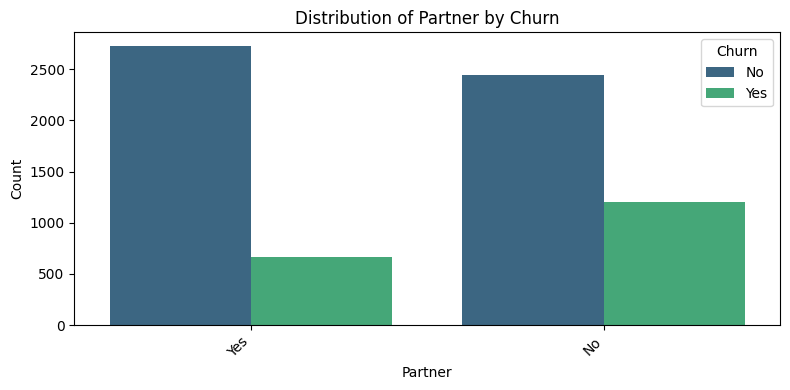

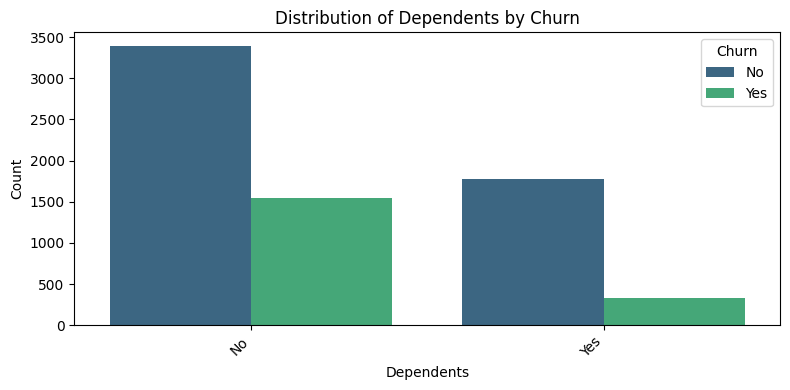

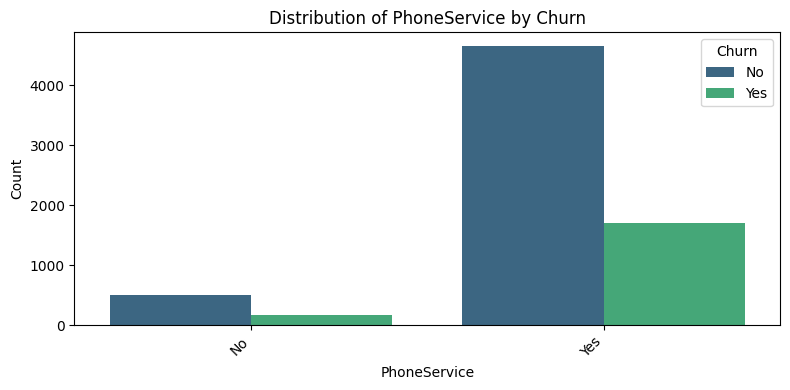

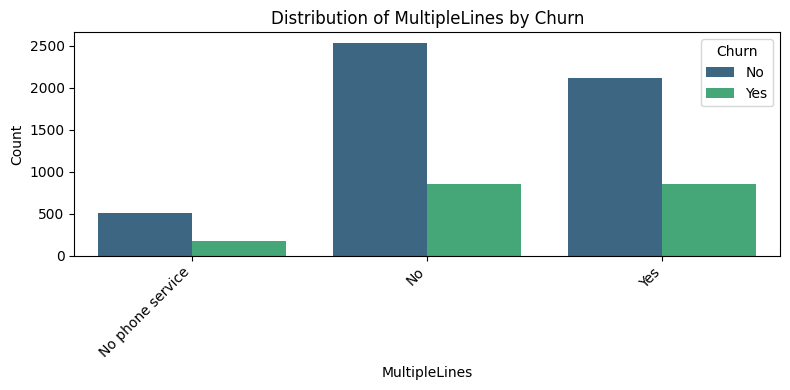

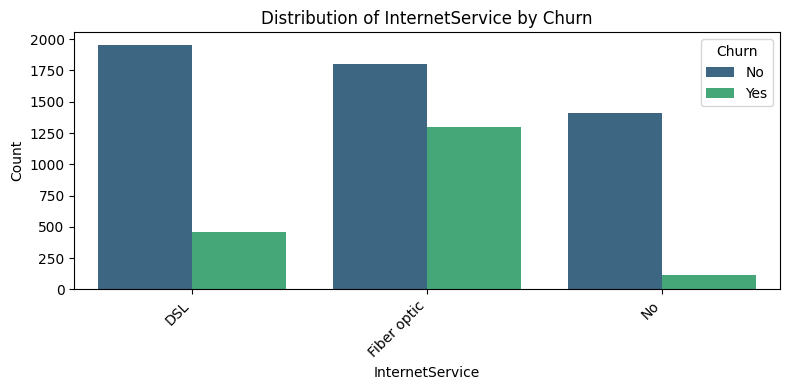

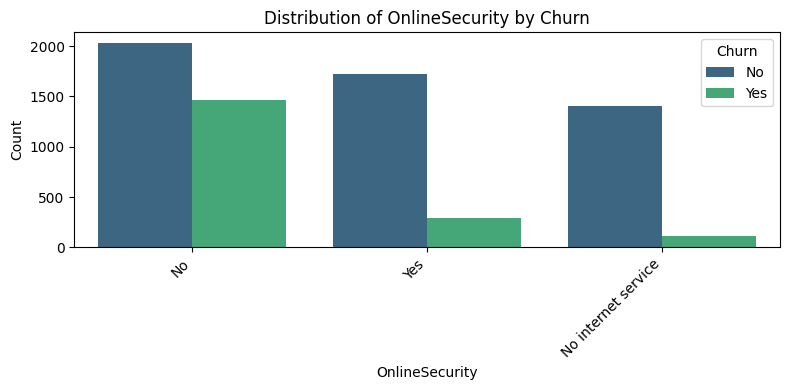

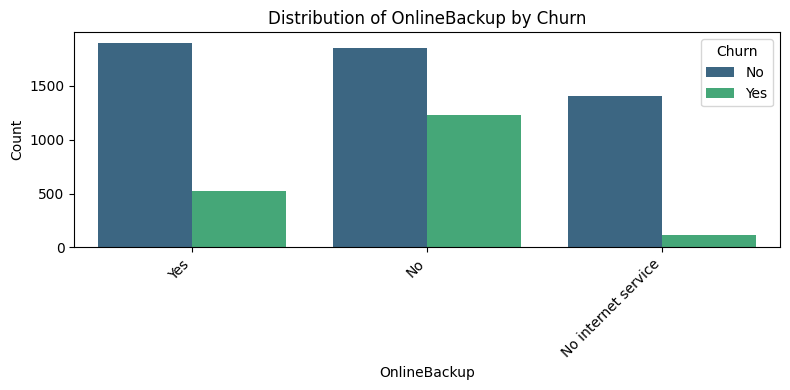

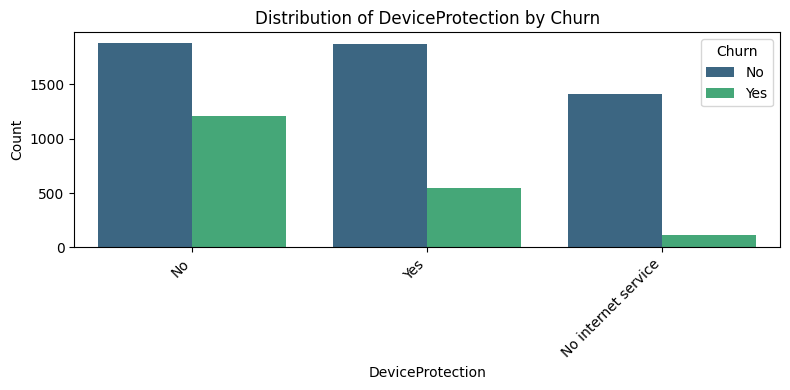

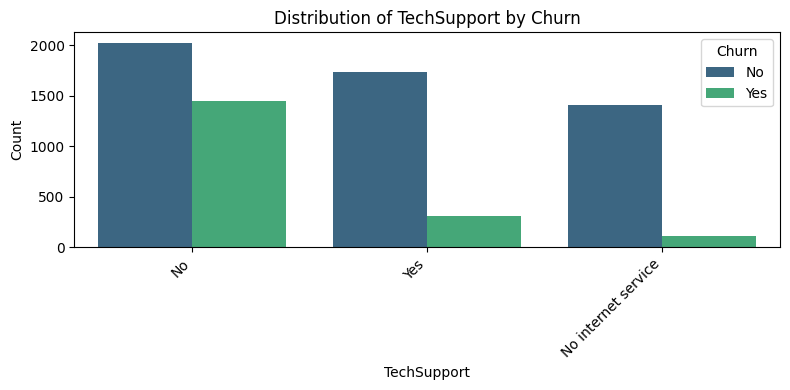

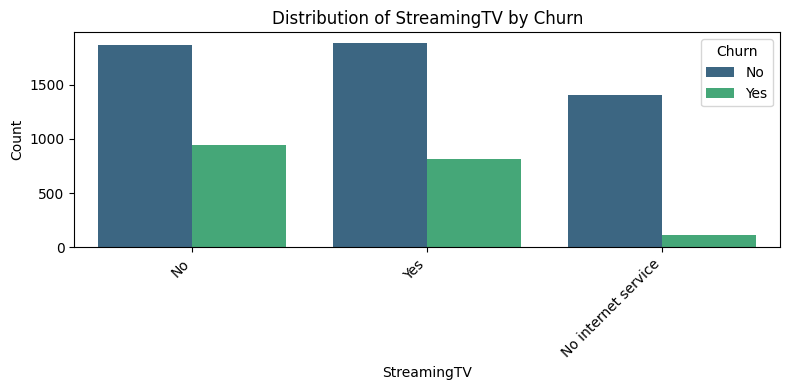

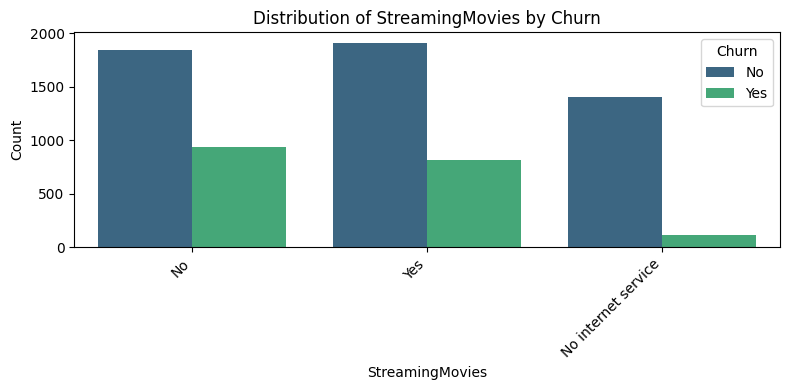

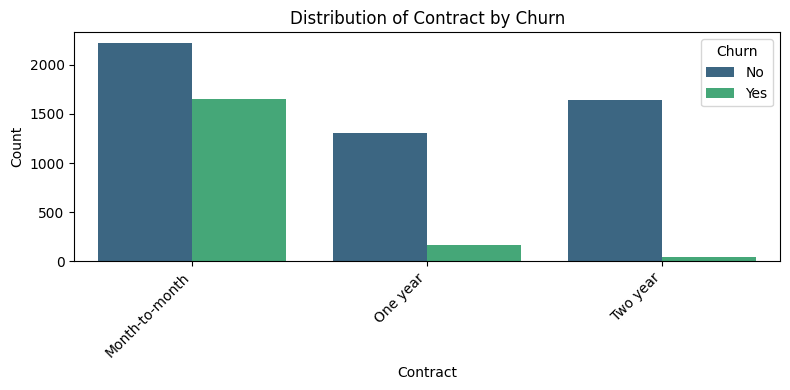

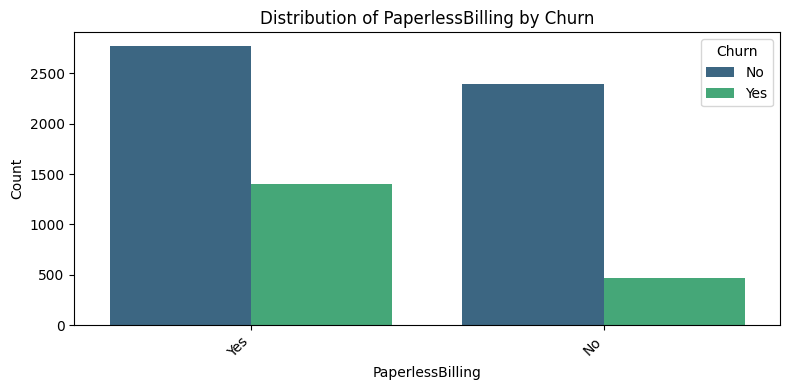

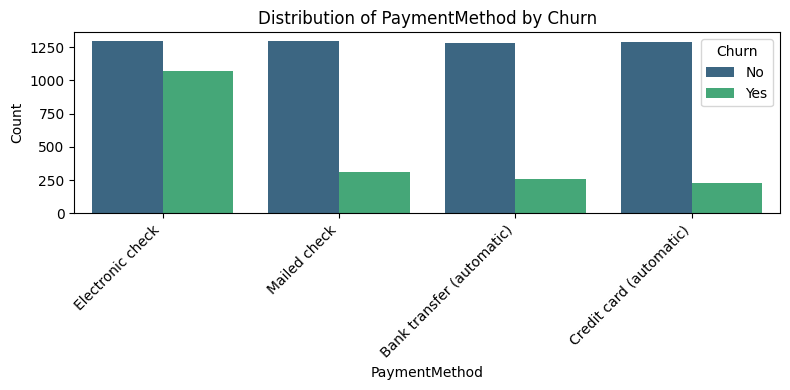

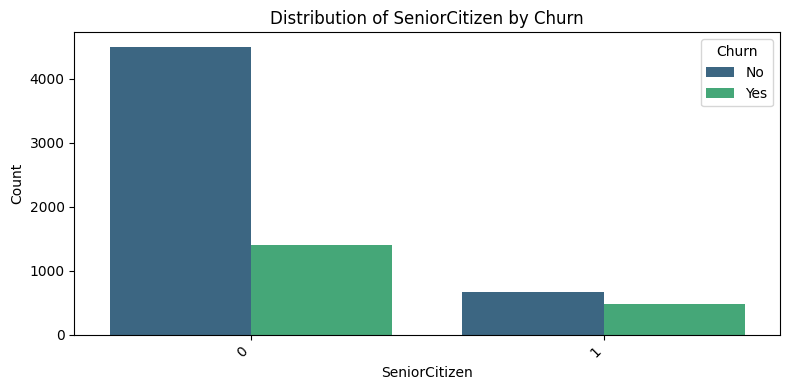

In [26]:
# Distribution of categorical features by churn
categorical_features = dataset.select_dtypes(include='object').columns.tolist()
categorical_features.remove('Churn')
categorical_features.append('SeniorCitizen')

for col in categorical_features:
  plt.figure(figsize=(8, 4))
  sns.countplot(data=dataset, x=col, hue='Churn', palette='viridis')
  plt.title(f'Distribution of {col} by Churn')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

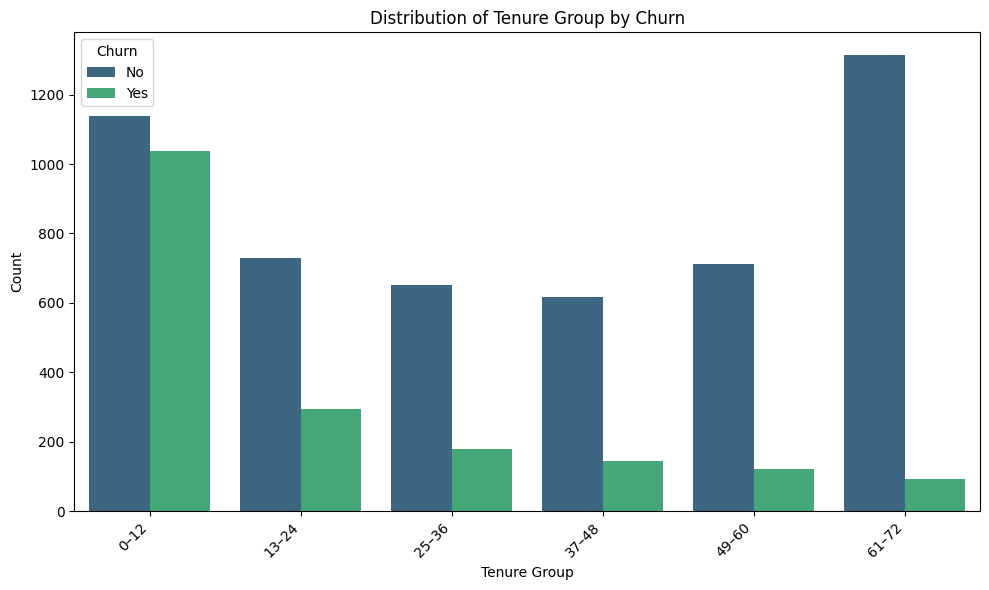

In [27]:
# Distribution of tenure groups by churn
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='tenure_group', hue='Churn', palette='viridis')
plt.title('Distribution of Tenure Group by Churn')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
object_dtypes = dataset.select_dtypes(include = 'object')
object_dtypes.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to encode
dataset_encoded = dataset.copy()

# Create label encoder instance
le = LabelEncoder()

# Identify categorical columns (object or category dtype)
cat_cols = dataset_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply label encoding to each categorical column
for col in cat_cols:
    dataset_encoded[col] = le.fit_transform(dataset_encoded[col])

# Check result
print(dataset_encoded.head())
print("\nEncoded columns:", cat_cols)

   gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0       0              0        1           0             0              1   
1       1              0        0           0             1              0   
2       1              0        0           0             1              0   
3       1              0        0           0             0              1   
4       0              0        0           0             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                0               0             2                 0  ...   
1                0               2             0                 2  ...   
2                0               2             2                 0  ...   
3                0               2             0                 2  ...   
4                1               0             0                 0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0 

In [31]:
dataset.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,AverageMonthlySpend
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441,64.799424
std,0.368844,30.085974,2266.771362,30.185891
min,0.000000,18.250000,18.800000,13.775000
25%,0.000000,35.587500,401.450000,36.179891
50%,0.000000,70.350000,1397.475000,70.373239
75%,0.000000,89.862500,3794.737500,90.179560
max,1.000000,118.750000,8684.800000,121.400000


In [32]:
def central_tendency_IQR(dataset, Quan):
        descriptive = pd.DataFrame(index=['Mean', 'Median', 'Mode', 'Q1:25%', 'Q2:50%', 'Q3:75%', 'Q4:100%', 'IQR', 'Lesser IQR', 'Greater IQR', 'min', 'max', 'kurtosis', 'skew','var','std'], columns=Quan)
    
        for columnName in Quan:
            descriptive.loc["Mean", columnName] = dataset[columnName].mean()
            descriptive.loc["Median", columnName] = dataset[columnName].median()
            descriptive.loc["Mode", columnName] = dataset[columnName].mode()[0]
            descriptive.loc["Q1:25%", columnName] = dataset[columnName].quantile(0.25)
            descriptive.loc["Q2:50%", columnName] = dataset[columnName].quantile(0.50)
            descriptive.loc["Q3:75%", columnName] = dataset[columnName].quantile(0.75)
            descriptive.loc["Q4:100%", columnName] = dataset[columnName].max()
            descriptive.loc["IQR", columnName] = dataset[columnName].quantile(0.75) - dataset[columnName].quantile(0.25)
            descriptive.loc["Lesser IQR", columnName] = dataset[columnName].quantile(0.25) - 1.5 * (dataset[columnName].quantile(0.75) - dataset[columnName].quantile(0.25))
            descriptive.loc["Greater IQR", columnName] = dataset[columnName].quantile(0.75) + 1.5 * (dataset[columnName].quantile(0.75) - dataset[columnName].quantile(0.25))
            descriptive.loc["min", columnName] = dataset[columnName].min()
            descriptive.loc["max", columnName] = dataset[columnName].max()
            descriptive.loc["kurtosis", columnName] = dataset[columnName].kurtosis()
            descriptive.loc["skew", columnName] = dataset[columnName].skew()
            descriptive.loc["var", columnName] = dataset[columnName].var()
            descriptive.loc["std", columnName] = dataset[columnName].std()
        return descriptive

In [30]:
dataset_encoded.to_csv('cleaned_dataset.csv', index=False)